In [3]:
import pandas as pd
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10.0, 5.0)


X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()


# K-means with N clusters
N = 7
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1)
km.fit(X)


# review the cluster labels
set(km.labels_)


X['cluster'] = km.predict(X)


XX = X.copy()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()


# calculate SC for K=7
from sklearn import metrics
metrics.silhouette_score(XX[['lon', 'lat']], XX.cluster)

0.0877531645144444

In [34]:
from sklearn.cluster import DBSCAN
from tqdm import tqdm
import numpy as np

start   = 0.0
stop    = 0.45
step    = 0.01
my_list = np.arange(start, stop+step, step)

startb   = 1
stopb    = 10
stepb    = .2 # To scale proportionately with epsilon increments
my_listb = np.arange(startb, stopb+stepb, stepb)

my_range = range(45)

one = []
for i in tqdm(my_range):
    dbscan = DBSCAN(eps = .05 + my_list[i] , min_samples = 1 + my_listb[i])
    XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
    one.append(metrics.silhouette_score(XX[['lat', 'lon']], XX.cluster))





  0%|          | 0/45 [00:00<?, ?it/s]



  2%|▏         | 1/45 [00:10<07:55, 10.81s/it]



  4%|▍         | 2/45 [00:17<06:45,  9.43s/it]



  7%|▋         | 3/45 [00:25<06:26,  9.20s/it]



  9%|▉         | 4/45 [00:32<05:46,  8.44s/it]



 11%|█         | 5/45 [00:38<05:10,  7.77s/it]



 13%|█▎        | 6/45 [00:44<04:45,  7.31s/it]



 16%|█▌        | 7/45 [00:51<04:25,  6.98s/it]



 18%|█▊        | 8/45 [00:57<04:10,  6.76s/it]



 20%|██        | 9/45 [01:03<03:59,  6.64s/it]



 22%|██▏       | 10/45 [01:09<03:49,  6.55s/it]



 24%|██▍       | 11/45 [01:18<04:03,  7.18s/it]



 27%|██▋       | 12/45 [01:25<03:50,  6.99s/it]



 29%|██▉       | 13/45 [01:31<03:36,  6.76s/it]



 31%|███       | 14/45 [01:37<03:25,  6.62s/it]



 33%|███▎      | 15/45 [01:43<03:15,  6.52s/it]



 36%|███▌      | 16/45 [01:50<03:06,  6.44s/it]



 38%|███▊      | 17/45 [01:56<02:58,  6.38s/it]



 40%|████      | 18/45 [02:02<02:51,  6.36s/it]



 42%|████▏     | 19/45 [02:09<02:45,  6.37s/i

<IPython.core.display.Javascript object>


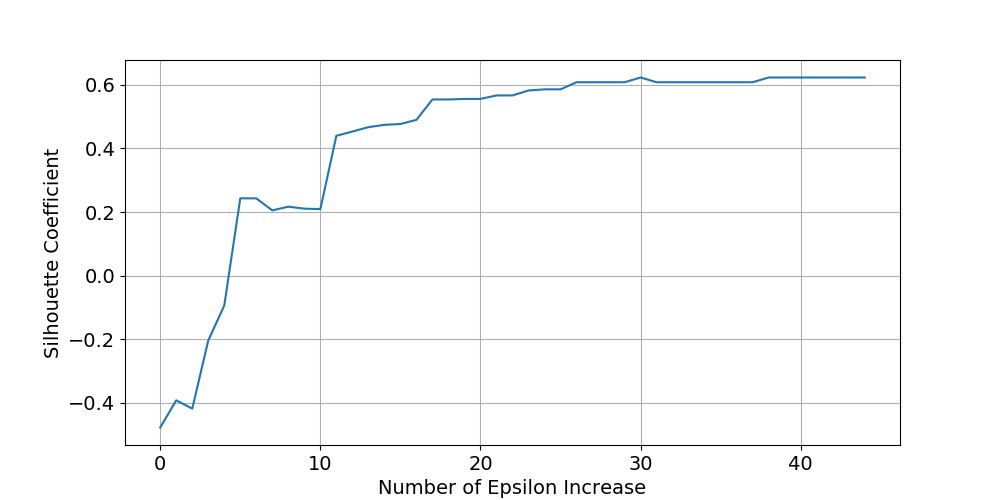

In [35]:
# plot the results
plt.figure()
plt.plot(my_range, one)
plt.xlabel('Number of Epsilon Increase')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

In [16]:
start   = 0.0
stop    = 0.45
step    = 0.01
my_list = np.arange(start, stop+step, step)

In [17]:
my_list

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45])

In [32]:
startb   = 1
stopb    = 10
stepb    = .20 # To scale proportionately with epsilon increments
my_listb = np.arange(startb, stopb+stepb, stepb)

In [33]:
len(my_listb)

46